In [ ]:
%pip install vaderSentiment
%pip install matplotlib
%pip install beautifulsoup4
%pip install ipython
%pip install scikit-learn
%pip install keras
%pip install numpy
%pip install textblob
%pip install nltk

#Sentiment of Original Texts

In [ ]:
import requests
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from IPython.display import Markdown
from bs4 import BeautifulSoup
from IPython.display import display, Markdown


# Data Preparation
response = requests.get("https://www.rocketlawyer.com/business-and-contracts/service-contracts/maintenance-and-repair-contracts/document/lawn-service-contract")
response.encoding = "ISO-8859-1"
text_data = response.text

# Extract the text from the HTML content
soup = BeautifulSoup(text_data, "html.parser")
text = soup.get_text()


# Split the text data into individual documents
documents = text_data.split('\n')
documents = text.split('. ')

# Split the documents into training and testing sets
train_data, test_data = train_test_split(documents, test_size=0.2)

# Split the text into individual sentences
sentences = text.split('. ')

# Text Vectorization with Stop Words
vectorizer = CountVectorizer(stop_words='english')
train_vectors = vectorizer.fit_transform(train_data)
test_vectors = vectorizer.transform(test_data)

# Define Training Labels
train_labels = [0] * len(train_data)

# Building the RNNs Model
model = Sequential()
model.add(Embedding(input_dim=train_vectors.shape[1], output_dim=100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

# Training the RNNs Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
train_labels = np.array(train_labels)
model.fit(train_vectors.toarray(), train_labels, epochs=10, batch_size=32)

# Predicting the Polarity
predictions = model.predict(test_vectors.toarray())

# Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()
# Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()
sentiment_scores = analyzer.polarity_scores(sentences)
print("Overall Sentiment Score is Positive:",sentiment_scores)

Epoch 1/10
2/2 [==============================] - 8s 636ms/step - loss: 0.6885 - accuracy: 0.2727
Epoch 2/10
2/2 [==============================] - 2s 776ms/step - loss: 0.5954 - accuracy: 1.0000
Epoch 3/10
2/2 [==============================] - 2s 789ms/step - loss: 0.4795 - accuracy: 1.0000
Epoch 4/10
2/2 [==============================] - 2s 692ms/step - loss: 0.2952 - accuracy: 1.0000
Epoch 5/10
2/2 [==============================] - 3s 1s/step - loss: 0.0593 - accuracy: 1.0000
Epoch 6/10
2/2 [==============================] - 2s 640ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 7/10
2/2 [==============================] - 2s 621ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 8/10
2/2 [==============================] - 2s 849ms/step - loss: 6.0933e-04 - accuracy: 1.0000
Epoch 9/10
2/2 [==============================] - 2s 717ms/step - loss: 3.6636e-04 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 1s 595ms/step
Overall Sentiment Score is Positive: {'neg': 0.0

#Inject Positive Sentences

In [ ]:
# Inject positive sentences and highlight them
positive_sentences = [
    "By signing a lawn service contract, you can enjoy a well-maintained and beautiful lawn throughout the year, without the hassle of doing it yourself",
    "With a lawn service contract, you can save valuable time and effort by leaving the lawn care tasks to the professionals, allowing you to focus on other important aspects of your life",
    "A lawn service contract ensures regular and consistent maintenance, guaranteeing that your lawn remains healthy, vibrant, and aesthetically pleasing",
    "By entrusting your lawn care to a professional service through a contract, you can have peace of mind knowing that experienced professionals will handle all aspects of lawn maintenance, including mowing, fertilizing, and weed control"
]

# highlighted_text = ""
# for i, sentence in enumerate(sentences):
#     if i < len(positive_sentences):
#         # Inject positive sentence
#         highlighted_sentence = f"**{positive_sentences[i]}**"
#         highlighted_text += highlighted_sentence + ". "
#     highlighted_text += sentence + ". "

# # Display the modified text with highlighted positive sentences
# display(Markdown(highlighted_text))

highlighted_text = ""
highlighted_sentences = []

for i, sentence in enumerate(sentences):
    if i < len(positive_sentences):
        # Inject positive sentence
        highlighted_sentence = f"**{positive_sentences[i]}**"
        highlighted_sentences.append(highlighted_sentence)
    highlighted_sentences.append(sentence)

highlighted_sentences.sort()
highlighted_text = ". ".join(highlighted_sentences)

# Display the modified text with highlighted positive sentences
display(Markdown(highlighted_text))



sentiment_scores = analyzer.polarity_scores(positive_sentences)

print("Overall Sentiment Score is Positive:",sentiment_scores)
print('-' * 50)

































. 






Free Lawn Service Contract Template & FAQs - Rocket Lawyer




























































Account

Explore



                            Make documents
                        

                            Sign documents
                        

                            Taxes
                                
 


                            Start a business
                        

                            Ask a lawyer
                        

                            Group Legal Benefits
                        

                            Pricing
                        



Get our app    




Account
Sign up
Sign in








Help
See our FAQs
Send an email
Chat online
Call (877) 881-0947












Help


See our FAQs
Send an email
Call us: (877) 881-0947








Dashboard
Member settings
Sign out









Logo







 
Make documents




Easily make legal documents

Find your document




                                                                Popular legal documents
                                                            

Business and contracts
Real estate
Family and personal



Non-Disclosure Agreement
LLC Operating Agreement
Independent Contractor Agreement
Business Contract
See more documents


Lease Agreement
Eviction Notice
Intent to Purchase Real Estate
Quitclaim Deed
See more documents


Last Will and Testament
Living Will
Divorce Settlement Agreement
Child Care Authorization
See more documents






 
Sign documents




eSign for FREE with RocketSign®

Start signing





 
Taxes

 




Let us do your taxes

File ConfidentlyTM with a pro





 
Start a business




Let us help you Start Up ConfidentlyTM

Get started




                                                                Popular business topics
                                                            

Business registrations
Business services
Business property



Start an LLC
Start a Corporation
Start a Non-profit


Registered Agent services
Statement of information
File a DBA


Trademark registration
Copyright protection
Make an NDA






 
Ask a lawyer




Get fast legal advice from an attorney

Ask your question




                                                                Popular legal topics
                                                            

Business and contracts
Finance and real estate
Family and personal



Starting a business
Contracts and business transactions
Intellectual property


Landlords
Home ownership
Taxes


Estate planning
Marriage
Divorce






 
Group Legal Benefits




Get legal benefits for your team

Request a demo





 
Pricing




Get HALF OFF with Rocket Legal+ membership

Start your free trial










 


Sign in
Sign up


Menu





 
Help                    





 
Help                    



See our FAQs
Send an email
Chat online
Call (877) 881-0947






 

























Legal documents



⌃


Business and contracts



⌃


Service contracts






⌃


Maintenance and repair contracts













MAKE YOUR FREE Lawn Service Contract


The terms in your document will update based on the information you provide.


                        Make document
                    







MAKE YOUR FREE
                Lawn Service Contract
            


Make document                    



 







What is a Lawn Service Contract?
As a lawn care provider, you can make and sign Lawn Service Contracts to safeguard your interests as you plan to provide lawn moving or other services. 




Back to top



Back to top






Preview






Create Your Document In Just 3 Easy Steps:            




Build your document
Answer a few simple questions to make your document in minutes






Save, print & share
Save progress and finish on any device, download & print anytime






Sign & make it legal
Securely sign online and invite others to sign







Related documents
Rocket Lawyer members who started a free Lawn Service Contract also made:





Housekeeping Agreement
Set up an agreement for housekeeping services







Janitorial Contract
Establish terms for janitorial services







Handyman Contract
Get the terms for handyman services in writing







Computer Service Contract
Get your computer service agreement in writing






                    Explore other Business and contracts documents
                






Ask a lawyer
Our network attorneys are here for you.




Input your question here

0/600



You've exceeded the character limit.












Rocket Lawyer Network Attorneys








Looking for something else?



Search query input field







Back to top





Start your Lawn Service Contract now and get Rocket Lawyer FREE for 7 days
Get legal services you can trust at prices you can afford. 



Can I get my own lawn care contract template online?





The great news is you do not have to start from scratch when putting your agreement in writing. 



How are Lawn Service Contracts structured?





The specific details to add are:Contact information for your clientWhat tasks you are committed to performingHow payment will be madeHow long the project will lastAs you might hope, Lawn Care Contracts that you build using Rocket Lawyer also contain the typical language with regard to the non-employment relationship, confidentiality, and finally, indemnification. 



How do I find lawn care bids?





You can find lawn care bids by networking, searching through weekly ads, browsing online postings, or leveraging customer referrals and social media websites. 



Would I need to take additional actions after making a contract for lawn service?





When you are ready to wrap up your drafted contract, it needs to be signed by both you and the property owner. 



Would Rocket Lawyer be able to review my Lawn Service Agreement before it is signed?





The answer will vary depending on whom you contact, but often some attorneys won't even agree to review your contract if they did not write it.                       .     All services will be completed by  at: , ,  .     NOW, THEREFORE, FOR AND IN CONSIDERATION of the mutual promises and agreements contained herein,  hires , and  agrees to provide Lawn Service to the  at the following locations under the terms and conditions hereby agreed upon by the parties:        .  shall maintain at all times adequate public liability insurance.  will not provide fringe benefits, including health insurance benefits, paid vacation, or any other employee benefit, for the benefit of .  will pay compensation to  for the Services upon completion of the Services.    .    .    .      .        . **A lawn service contract ensures regular and consistent maintenance, guaranteeing that your lawn remains healthy, vibrant, and aesthetically pleasing**. **By entrusting your lawn care to a professional service through a contract, you can have peace of mind knowing that experienced professionals will handle all aspects of lawn maintenance, including mowing, fertilizing, and weed control**. **By signing a lawn service contract, you can enjoy a well-maintained and beautiful lawn throughout the year, without the hassle of doing it yourself**. **With a lawn service contract, you can save valuable time and effort by leaving the lawn care tasks to the professionals, allowing you to focus on other important aspects of your life**. A better approach worth consideration is to go through the On Call network. APPLICABLE LAW. As a Rocket Lawyer member, you also can download it in PDF format or as a Word file, print, and/or copy it as necessary. Be sure to give a final copy of your fully signed agreement to the other party. Beginning on , Service Provider will provide the following services (collectively, the "Services"):     shall not be responsible for replacement of trees, shrubs or other plants which are lost to casualty such as theft, aberrant weather or disease. DESCRIPTION OF SERVICES. ENTIRE AGREEMENT. Further adjustments and edits are permitted, as needed. INSURANCE. If a court finds that any provision of this Contract is invalid or unenforceable, but that by limiting such provision it would become valid and enforceable, then such provision shall be deemed to be written, construed, and enforced as so limited. If any provision of this Contract shall be held to be invalid or unenforceable for any reason, the remaining provisions shall continue to be valid and enforceable. It is understood by the parties that  is an independent contractor with respect to , and not an employee of . PAYMENT FOR SERVICES. Please note that Rocket Lawyer is not a "lawyer referral service," "accountant referral service," accounting firm, or law firm, does not provide legal or tax advice or representation (except in certain jurisdictions), and is not intended as a substitute for an attorney, accountant, accounting firm, or law firm.The Utah Supreme Court has authorized Rocket Lawyer to provide legal services, including the practice of law, as a nonlawyer-owned company; further information regarding this authorization can be found in our Terms of Service.Use of Rocket Lawyer is subject to our Terms of Service and Privacy Policy. RELATIONSHIP OF PARTIES. Rocket Lawyer has helped over 20 million businesses, families and individuals make legal documents, get attorney advice, and confidently protect their futures.Legal information and other services are delivered by or through Rocket Lawyer via RocketLawyer.com. RocketSign® makes it easy to collect signatures on the go. SEVERABILITY. SIGNATORIES. Signed by both the lawn care provider and the property owner, this document can help define each party's respective expectations. TERM. The following list of benefits may help you make the decision to use one:Neither party is surprised by how long the work takesRoles and responsibilities are understood by allPayment requirements are clearly definedWithout this document, you and/or your client may experience one or more of these unwanted outcomes: delayed delivery, unrealistic expectations, unmet standards of quality, difficulty getting paid, and limited legal recourse when problems arise. This Contract      . This Contract contains the entire agreement of the parties, and there are no other promises or conditions in any other contract whether oral or written. This Contract shall be governed by the laws of the State of . This Contract shall be signed on behalf of  by , its , and on behalf of  by , its , and shall be effective as of the date first written above. Typically, for this level of customization, you could ultimately end up paying a conventional law firm a few hundred dollars, if not more, in fees.If you have any questions or hesitations before you begin, talk to a lawyer  , or check out more business legal documents  in our library. We are always here to help answer any questions. When using the document tools on Rocket Lawyer, any lawn care provider should feel empowered to create Lawn Service Contracts with relative ease. When you build your Lawn Service Contract on Rocket Lawyer, you have the option to access Document Defense®, which allows a lawyer to help you get paid or enforce your legal rights.
When to use a Lawn Service Contract:
You will be providing services for a company as an independent contractor and not an employee.You will be contracting with an independent contractor who will provide services to your company.





Sample Lawn Service Contract
The terms in your document will update based on the information you provide





This document has been customized over 68.7K times



Legally binding and enforceable



Ask a lawyer questions about your document



Sign this document online for free with RocketSignÂ®




Expand 


     Lawn Service Contract       This Lawn Service Contract (this "Contract") is made effective as of , by and between , of , ,  , and , of , ,  . While making your agreement, you'll also have the ability to decide which state's jurisdiction it will be subject to. With a Premium membership, you will be able to ask for advice from an attorney with business experience or send other legal questions about your Lawn Service Agreement. You'll get:







All the legal documents you needâcustomize, share, print & more 






Unlimited electronic signatures with RocketSignÂ® 






Ask a lawyer questions or have them review your document 






Dispute protection on all your contracts with Document DefenseÂ® 






30-minute phone call with a lawyer about any new issue 






Discounts on business and attorney services 




                        Make document
        





Trusted and secure








Back to top














































Rocket Lawyer



                                                Home
                                        



                                                Legal documents
                                        



                                                Sign documents
                                        



                                                Taxes
                                        



                                                Ask a lawyer
                                        



                                                Incorporation
                                        



                                                Start an LLC
                                        



                                                For employers
                                        



                                                Pricing
                                        



                                                Mobile apps
                                        



                                                Site map
                                        



                                                Do not sell or share my personal information 







More legal resources



                                                Lawyer directory
                                        



                                                Legal resources
                                        



                                                Legal dictionary
                                        


For attorneys



                                                Get matched with clients
                                        


For developers



                                                APIs
                                        






Connect with us



                                                About us
                                        



                                                Careers
                                        



                                                Contact us
                                        



                                                Partner with us
                                        



                                                Newsroom
                                        


Follow us





















Assistance


CHAT WITH US   ã


(877) 881-0947



                                                Call us Monday-Friday 6am-6pm PT
                                        






Rocket Lawyer UK
Rocket Lawyer ES
Rocket Lawyer FR
Rocket Lawyer NL
Rocket Lawyer BR



Copyright  Rocket Lawyer Incorporated.Rocket Lawyer is an online legal technology company that makes the law simpler and more affordable for businesses, families and individuals. Your agreement will be assembled piece by piece, as you answer simple questions to provide information. no later than .   .           PARTY CONTRACTING SERVICES:                  By:   Date:                 SERVICE PROVIDER:                  By:   Date:              




 







Lawn Service Contract FAQs








Collapse all

|






Expand all







Why should I always create a Lawn Care Contract?





Regardless of how long your lawn care crew has been in operation, it is always important to get the details of your work in writing

Overall Sentiment Score is Positive: {'neg': 0.0, 'neu': 0.757, 'pos': 0.243, 'compound': 0.9837}
--------------------------------------------------


#Inject Negative Sentences

In [ ]:
negative_sentences = [
    "The lawn service contract lacked clear specifications regarding the frequency of lawn maintenance, leading to inconsistent and unreliable service",
    "The contract did not include provisions for addressing potential damage caused by the lawn service provider, leaving the homeowner responsible for any repairs or replacements",
    "Despite the contract stating a specific start date, the lawn service provider failed to begin work on time, causing frustration and inconvenience",
    "The contract did not outline a process for addressing disputes or complaints, leaving the homeowner with limited recourse if issues arose"
]
highlighted_text_negative = ""
for i, sentence in enumerate(sentences):
  if i < len(negative_sentences):
    # Inject negative sentence
    highlighted_sentence_negative = f"**{negative_sentences[i]}**"
    highlighted_text_negative += highlighted_sentence_negative + ". "
  highlighted_text_negative += sentence + ". "

# Display the modified text with highlighted negative sentences
display(Markdown(highlighted_text_negative))

negative_sentiment_scores = analyzer.polarity_scores(negative_sentences)
negative_sentiment_scores['neg'] *= -1
negative_sentiment_scores['compound'] *= 1

# Determine if overall sentiment is negative
overall_sentiment_scores = analyzer.polarity_scores(text)
if overall_sentiment_scores['neg'] < overall_sentiment_scores['pos']:
    print("Overall Sentiment Score is Negative:", negative_sentiment_scores)
print('-' * 50)


**The lawn service contract lacked clear specifications regarding the frequency of lawn maintenance, leading to inconsistent and unreliable service**. 






Free Lawn Service Contract Template & FAQs - Rocket Lawyer




























































Account

Explore



                            Make documents
                        

                            Sign documents
                        

                            Taxes
                                
 


                            Start a business
                        

                            Ask a lawyer
                        

                            Group Legal Benefits
                        

                            Pricing
                        



Get our app    




Account
Sign up
Sign in








Help
See our FAQs
Send an email
Chat online
Call (877) 881-0947












Help


See our FAQs
Send an email
Call us: (877) 881-0947








Dashboard
Member settings
Sign out









Logo







 
Make documents




Easily make legal documents

Find your document




                                                                Popular legal documents
                                                            

Business and contracts
Real estate
Family and personal



Non-Disclosure Agreement
LLC Operating Agreement
Independent Contractor Agreement
Business Contract
See more documents


Lease Agreement
Eviction Notice
Intent to Purchase Real Estate
Quitclaim Deed
See more documents


Last Will and Testament
Living Will
Divorce Settlement Agreement
Child Care Authorization
See more documents






 
Sign documents




eSign for FREE with RocketSign®

Start signing





 
Taxes

 




Let us do your taxes

File ConfidentlyTM with a pro





 
Start a business




Let us help you Start Up ConfidentlyTM

Get started




                                                                Popular business topics
                                                            

Business registrations
Business services
Business property



Start an LLC
Start a Corporation
Start a Non-profit


Registered Agent services
Statement of information
File a DBA


Trademark registration
Copyright protection
Make an NDA






 
Ask a lawyer




Get fast legal advice from an attorney

Ask your question




                                                                Popular legal topics
                                                            

Business and contracts
Finance and real estate
Family and personal



Starting a business
Contracts and business transactions
Intellectual property


Landlords
Home ownership
Taxes


Estate planning
Marriage
Divorce






 
Group Legal Benefits




Get legal benefits for your team

Request a demo





 
Pricing




Get HALF OFF with Rocket Legal+ membership

Start your free trial










 


Sign in
Sign up


Menu





 
Help                    





 
Help                    



See our FAQs
Send an email
Chat online
Call (877) 881-0947






 

























Legal documents



⌃


Business and contracts



⌃


Service contracts






⌃


Maintenance and repair contracts













MAKE YOUR FREE Lawn Service Contract


The terms in your document will update based on the information you provide.


                        Make document
                    







MAKE YOUR FREE
                Lawn Service Contract
            


Make document                    



 







What is a Lawn Service Contract?
As a lawn care provider, you can make and sign Lawn Service Contracts to safeguard your interests as you plan to provide lawn moving or other services. **The contract did not include provisions for addressing potential damage caused by the lawn service provider, leaving the homeowner responsible for any repairs or replacements**. Signed by both the lawn care provider and the property owner, this document can help define each party's respective expectations. **Despite the contract stating a specific start date, the lawn service provider failed to begin work on time, causing frustration and inconvenience**. When you build your Lawn Service Contract on Rocket Lawyer, you have the option to access Document Defense®, which allows a lawyer to help you get paid or enforce your legal rights.
When to use a Lawn Service Contract:
You will be providing services for a company as an independent contractor and not an employee.You will be contracting with an independent contractor who will provide services to your company.





Sample Lawn Service Contract
The terms in your document will update based on the information you provide





This document has been customized over 68.7K times



Legally binding and enforceable



Ask a lawyer questions about your document



Sign this document online for free with RocketSignÂ®




Expand 


     Lawn Service Contract       This Lawn Service Contract (this "Contract") is made effective as of , by and between , of , ,  , and , of , ,  . **The contract did not outline a process for addressing disputes or complaints, leaving the homeowner with limited recourse if issues arose**.     NOW, THEREFORE, FOR AND IN CONSIDERATION of the mutual promises and agreements contained herein,  hires , and  agrees to provide Lawn Service to the  at the following locations under the terms and conditions hereby agreed upon by the parties:        . DESCRIPTION OF SERVICES. Beginning on , Service Provider will provide the following services (collectively, the "Services"):     shall not be responsible for replacement of trees, shrubs or other plants which are lost to casualty such as theft, aberrant weather or disease.     All services will be completed by  at: , ,  .        . PAYMENT FOR SERVICES.  will pay compensation to  for the Services upon completion of the Services. no later than .                       . TERM. This Contract      . RELATIONSHIP OF PARTIES. It is understood by the parties that  is an independent contractor with respect to , and not an employee of .  will not provide fringe benefits, including health insurance benefits, paid vacation, or any other employee benefit, for the benefit of .      . INSURANCE.  shall maintain at all times adequate public liability insurance.   . ENTIRE AGREEMENT. This Contract contains the entire agreement of the parties, and there are no other promises or conditions in any other contract whether oral or written.    . SEVERABILITY. If any provision of this Contract shall be held to be invalid or unenforceable for any reason, the remaining provisions shall continue to be valid and enforceable. If a court finds that any provision of this Contract is invalid or unenforceable, but that by limiting such provision it would become valid and enforceable, then such provision shall be deemed to be written, construed, and enforced as so limited.    . APPLICABLE LAW. This Contract shall be governed by the laws of the State of .    . SIGNATORIES. This Contract shall be signed on behalf of  by , its , and on behalf of  by , its , and shall be effective as of the date first written above.           PARTY CONTRACTING SERVICES:                  By:   Date:                 SERVICE PROVIDER:                  By:   Date:              




 







Lawn Service Contract FAQs








Collapse all

|






Expand all







Why should I always create a Lawn Care Contract?





Regardless of how long your lawn care crew has been in operation, it is always important to get the details of your work in writing. The following list of benefits may help you make the decision to use one:Neither party is surprised by how long the work takesRoles and responsibilities are understood by allPayment requirements are clearly definedWithout this document, you and/or your client may experience one or more of these unwanted outcomes: delayed delivery, unrealistic expectations, unmet standards of quality, difficulty getting paid, and limited legal recourse when problems arise. 



How are Lawn Service Contracts structured?





The specific details to add are:Contact information for your clientWhat tasks you are committed to performingHow payment will be madeHow long the project will lastAs you might hope, Lawn Care Contracts that you build using Rocket Lawyer also contain the typical language with regard to the non-employment relationship, confidentiality, and finally, indemnification. While making your agreement, you'll also have the ability to decide which state's jurisdiction it will be subject to. Further adjustments and edits are permitted, as needed. 



Can I get my own lawn care contract template online?





The great news is you do not have to start from scratch when putting your agreement in writing. When using the document tools on Rocket Lawyer, any lawn care provider should feel empowered to create Lawn Service Contracts with relative ease. Your agreement will be assembled piece by piece, as you answer simple questions to provide information. Typically, for this level of customization, you could ultimately end up paying a conventional law firm a few hundred dollars, if not more, in fees.If you have any questions or hesitations before you begin, talk to a lawyer  , or check out more business legal documents  in our library. 



Would I need to take additional actions after making a contract for lawn service?





When you are ready to wrap up your drafted contract, it needs to be signed by both you and the property owner. RocketSign® makes it easy to collect signatures on the go. Be sure to give a final copy of your fully signed agreement to the other party. As a Rocket Lawyer member, you also can download it in PDF format or as a Word file, print, and/or copy it as necessary. 



Would Rocket Lawyer be able to review my Lawn Service Agreement before it is signed?





The answer will vary depending on whom you contact, but often some attorneys won't even agree to review your contract if they did not write it. A better approach worth consideration is to go through the On Call network. With a Premium membership, you will be able to ask for advice from an attorney with business experience or send other legal questions about your Lawn Service Agreement. We are always here to help answer any questions. 



How do I find lawn care bids?





You can find lawn care bids by networking, searching through weekly ads, browsing online postings, or leveraging customer referrals and social media websites. 




Back to top



Back to top






Preview






Create Your Document In Just 3 Easy Steps:            




Build your document
Answer a few simple questions to make your document in minutes






Save, print & share
Save progress and finish on any device, download & print anytime






Sign & make it legal
Securely sign online and invite others to sign







Related documents
Rocket Lawyer members who started a free Lawn Service Contract also made:





Housekeeping Agreement
Set up an agreement for housekeeping services







Janitorial Contract
Establish terms for janitorial services







Handyman Contract
Get the terms for handyman services in writing







Computer Service Contract
Get your computer service agreement in writing






                    Explore other Business and contracts documents
                






Ask a lawyer
Our network attorneys are here for you.




Input your question here

0/600



You've exceeded the character limit.












Rocket Lawyer Network Attorneys








Looking for something else?



Search query input field







Back to top





Start your Lawn Service Contract now and get Rocket Lawyer FREE for 7 days
Get legal services you can trust at prices you can afford. You'll get:







All the legal documents you needâcustomize, share, print & more 






Unlimited electronic signatures with RocketSignÂ® 






Ask a lawyer questions or have them review your document 






Dispute protection on all your contracts with Document DefenseÂ® 






30-minute phone call with a lawyer about any new issue 






Discounts on business and attorney services 




                        Make document
        





Trusted and secure








Back to top














































Rocket Lawyer



                                                Home
                                        



                                                Legal documents
                                        



                                                Sign documents
                                        



                                                Taxes
                                        



                                                Ask a lawyer
                                        



                                                Incorporation
                                        



                                                Start an LLC
                                        



                                                For employers
                                        



                                                Pricing
                                        



                                                Mobile apps
                                        



                                                Site map
                                        



                                                Do not sell or share my personal information 







More legal resources



                                                Lawyer directory
                                        



                                                Legal resources
                                        



                                                Legal dictionary
                                        


For attorneys



                                                Get matched with clients
                                        


For developers



                                                APIs
                                        






Connect with us



                                                About us
                                        



                                                Careers
                                        



                                                Contact us
                                        



                                                Partner with us
                                        



                                                Newsroom
                                        


Follow us





















Assistance


CHAT WITH US   ã


(877) 881-0947



                                                Call us Monday-Friday 6am-6pm PT
                                        






Rocket Lawyer UK
Rocket Lawyer ES
Rocket Lawyer FR
Rocket Lawyer NL
Rocket Lawyer BR



Copyright  Rocket Lawyer Incorporated.Rocket Lawyer is an online legal technology company that makes the law simpler and more affordable for businesses, families and individuals. Rocket Lawyer has helped over 20 million businesses, families and individuals make legal documents, get attorney advice, and confidently protect their futures.Legal information and other services are delivered by or through Rocket Lawyer via RocketLawyer.com. Please note that Rocket Lawyer is not a "lawyer referral service," "accountant referral service," accounting firm, or law firm, does not provide legal or tax advice or representation (except in certain jurisdictions), and is not intended as a substitute for an attorney, accountant, accounting firm, or law firm.The Utah Supreme Court has authorized Rocket Lawyer to provide legal services, including the practice of law, as a nonlawyer-owned company; further information regarding this authorization can be found in our Terms of Service.Use of Rocket Lawyer is subject to our Terms of Service and Privacy Policy. 





























. 

Overall Sentiment Score is Negative: {'neg': -0.168, 'neu': 0.782, 'pos': 0.05, 'compound': -0.886}
--------------------------------------------------


#Comparison Between Results

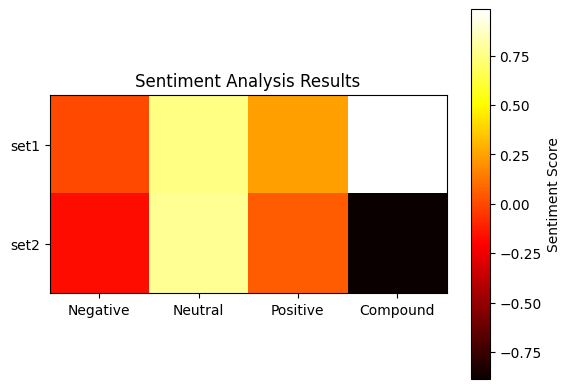

     neg    neu    pos  compound
0  0.000  0.757  0.243    0.9837
1 -0.168  0.782  0.050   -0.8860


In [ ]:
#Create Heatmap for the results
opposite_sentiment_scores = np.array([[0.0 , 0.757 , 0.243 , 0.9837],[-0.168, 0.782, 0.05, -0.886]])
texts = ['set1', 'set2']
sentiments = ['Negative', 'Neutral', 'Positive', 'Compound']

plt.imshow(opposite_sentiment_scores, cmap='hot', interpolation='nearest')
plt.colorbar(label='Sentiment Score')
plt.xticks(np.arange(len(sentiments)), sentiments)
plt.yticks(np.arange(len(texts)), texts)
plt.title('Sentiment Analysis Results')
plt.show()

import pandas as pd
# Sample sentiment scores
sentiment_scores = [
    [0.0 , 0.757 , 0.243 , 0.9837],
    [-0.168, 0.782, 0.05, -0.886]
]

# Create a dataframe to store the sentiment analysis data
sentiment_df = pd.DataFrame(sentiment_scores, columns=['neg', 'neu', 'pos', 'compound'])

# Display the dataframe
print(sentiment_df)

#Sort sentences and Inject more Positive Sentences

In [ ]:
# Inject positive sentences and highlight them
positive_sentences = [
    "By signing a lawn service contract, you can enjoy a well-maintained and beautiful lawn throughout the year, without the hassle of doing it yourself",
    "With a lawn service contract, you can save valuable time and effort by leaving the lawn care tasks to the professionals, allowing you to focus on other important aspects of your life",
    "A lawn service contract ensures regular and consistent maintenance, guaranteeing that your lawn remains healthy, vibrant, and aesthetically pleasing",
    "By entrusting your lawn care to a professional service through a contract, you can have peace of mind knowing that experienced professionals will handle all aspects of lawn maintenance, including mowing, fertilizing, and weed control"
    "A lawn service contract provides consistent and reliable maintenance, ensuring that your lawn always looks its best"
    "By having a lawn service contract, you can avoid the hassle of purchasing and maintaining expensive lawn care equipment"
]

highlighted_text = ""
highlighted_sentences = []

for i, sentence in enumerate(sentences):
    if i < len(positive_sentences):
        # Inject positive sentence
        highlighted_sentence = f"**{positive_sentences[i]}**"
        highlighted_sentences.append(highlighted_sentence)
    highlighted_sentences.append(sentence)

highlighted_sentences.sort()
highlighted_text = ". ".join(highlighted_sentences)

# Display the modified text with highlighted positive sentences
display(Markdown(highlighted_text))



sentiment_scores = analyzer.polarity_scores(positive_sentences)

print("Overall Sentiment Score is Positive:",sentiment_scores)
print('-' * 50)

































. 






Free Lawn Service Contract Template & FAQs - Rocket Lawyer




























































Account

Explore



                            Make documents
                        

                            Sign documents
                        

                            Taxes
                                
 


                            Start a business
                        

                            Ask a lawyer
                        

                            Group Legal Benefits
                        

                            Pricing
                        



Get our app    




Account
Sign up
Sign in








Help
See our FAQs
Send an email
Chat online
Call (877) 881-0947












Help


See our FAQs
Send an email
Call us: (877) 881-0947








Dashboard
Member settings
Sign out









Logo







 
Make documents




Easily make legal documents

Find your document




                                                                Popular legal documents
                                                            

Business and contracts
Real estate
Family and personal



Non-Disclosure Agreement
LLC Operating Agreement
Independent Contractor Agreement
Business Contract
See more documents


Lease Agreement
Eviction Notice
Intent to Purchase Real Estate
Quitclaim Deed
See more documents


Last Will and Testament
Living Will
Divorce Settlement Agreement
Child Care Authorization
See more documents






 
Sign documents




eSign for FREE with RocketSign®

Start signing





 
Taxes

 




Let us do your taxes

File ConfidentlyTM with a pro





 
Start a business




Let us help you Start Up ConfidentlyTM

Get started




                                                                Popular business topics
                                                            

Business registrations
Business services
Business property



Start an LLC
Start a Corporation
Start a Non-profit


Registered Agent services
Statement of information
File a DBA


Trademark registration
Copyright protection
Make an NDA






 
Ask a lawyer




Get fast legal advice from an attorney

Ask your question




                                                                Popular legal topics
                                                            

Business and contracts
Finance and real estate
Family and personal



Starting a business
Contracts and business transactions
Intellectual property


Landlords
Home ownership
Taxes


Estate planning
Marriage
Divorce






 
Group Legal Benefits




Get legal benefits for your team

Request a demo





 
Pricing




Get HALF OFF with Rocket Legal+ membership

Start your free trial










 


Sign in
Sign up


Menu





 
Help                    





 
Help                    



See our FAQs
Send an email
Chat online
Call (877) 881-0947






 

























Legal documents



⌃


Business and contracts



⌃


Service contracts






⌃


Maintenance and repair contracts













MAKE YOUR FREE Lawn Service Contract


The terms in your document will update based on the information you provide.


                        Make document
                    







MAKE YOUR FREE
                Lawn Service Contract
            


Make document                    



 







What is a Lawn Service Contract?
As a lawn care provider, you can make and sign Lawn Service Contracts to safeguard your interests as you plan to provide lawn moving or other services. 




Back to top



Back to top






Preview






Create Your Document In Just 3 Easy Steps:            




Build your document
Answer a few simple questions to make your document in minutes






Save, print & share
Save progress and finish on any device, download & print anytime






Sign & make it legal
Securely sign online and invite others to sign







Related documents
Rocket Lawyer members who started a free Lawn Service Contract also made:





Housekeeping Agreement
Set up an agreement for housekeeping services







Janitorial Contract
Establish terms for janitorial services







Handyman Contract
Get the terms for handyman services in writing







Computer Service Contract
Get your computer service agreement in writing






                    Explore other Business and contracts documents
                






Ask a lawyer
Our network attorneys are here for you.




Input your question here

0/600



You've exceeded the character limit.












Rocket Lawyer Network Attorneys








Looking for something else?



Search query input field







Back to top





Start your Lawn Service Contract now and get Rocket Lawyer FREE for 7 days
Get legal services you can trust at prices you can afford. 



Can I get my own lawn care contract template online?





The great news is you do not have to start from scratch when putting your agreement in writing. 



How are Lawn Service Contracts structured?





The specific details to add are:Contact information for your clientWhat tasks you are committed to performingHow payment will be madeHow long the project will lastAs you might hope, Lawn Care Contracts that you build using Rocket Lawyer also contain the typical language with regard to the non-employment relationship, confidentiality, and finally, indemnification. 



How do I find lawn care bids?





You can find lawn care bids by networking, searching through weekly ads, browsing online postings, or leveraging customer referrals and social media websites. 



Would I need to take additional actions after making a contract for lawn service?





When you are ready to wrap up your drafted contract, it needs to be signed by both you and the property owner. 



Would Rocket Lawyer be able to review my Lawn Service Agreement before it is signed?





The answer will vary depending on whom you contact, but often some attorneys won't even agree to review your contract if they did not write it.                       .     All services will be completed by  at: , ,  .     NOW, THEREFORE, FOR AND IN CONSIDERATION of the mutual promises and agreements contained herein,  hires , and  agrees to provide Lawn Service to the  at the following locations under the terms and conditions hereby agreed upon by the parties:        .  shall maintain at all times adequate public liability insurance.  will not provide fringe benefits, including health insurance benefits, paid vacation, or any other employee benefit, for the benefit of .  will pay compensation to  for the Services upon completion of the Services.    .    .    .      .        . **A lawn service contract ensures regular and consistent maintenance, guaranteeing that your lawn remains healthy, vibrant, and aesthetically pleasing**. **By entrusting your lawn care to a professional service through a contract, you can have peace of mind knowing that experienced professionals will handle all aspects of lawn maintenance, including mowing, fertilizing, and weed controlA lawn service contract provides consistent and reliable maintenance, ensuring that your lawn always looks its bestBy having a lawn service contract, you can avoid the hassle of purchasing and maintaining expensive lawn care equipment**. **By signing a lawn service contract, you can enjoy a well-maintained and beautiful lawn throughout the year, without the hassle of doing it yourself**. **With a lawn service contract, you can save valuable time and effort by leaving the lawn care tasks to the professionals, allowing you to focus on other important aspects of your life**. A better approach worth consideration is to go through the On Call network. APPLICABLE LAW. As a Rocket Lawyer member, you also can download it in PDF format or as a Word file, print, and/or copy it as necessary. Be sure to give a final copy of your fully signed agreement to the other party. Beginning on , Service Provider will provide the following services (collectively, the "Services"):     shall not be responsible for replacement of trees, shrubs or other plants which are lost to casualty such as theft, aberrant weather or disease. DESCRIPTION OF SERVICES. ENTIRE AGREEMENT. Further adjustments and edits are permitted, as needed. INSURANCE. If a court finds that any provision of this Contract is invalid or unenforceable, but that by limiting such provision it would become valid and enforceable, then such provision shall be deemed to be written, construed, and enforced as so limited. If any provision of this Contract shall be held to be invalid or unenforceable for any reason, the remaining provisions shall continue to be valid and enforceable. It is understood by the parties that  is an independent contractor with respect to , and not an employee of . PAYMENT FOR SERVICES. Please note that Rocket Lawyer is not a "lawyer referral service," "accountant referral service," accounting firm, or law firm, does not provide legal or tax advice or representation (except in certain jurisdictions), and is not intended as a substitute for an attorney, accountant, accounting firm, or law firm.The Utah Supreme Court has authorized Rocket Lawyer to provide legal services, including the practice of law, as a nonlawyer-owned company; further information regarding this authorization can be found in our Terms of Service.Use of Rocket Lawyer is subject to our Terms of Service and Privacy Policy. RELATIONSHIP OF PARTIES. Rocket Lawyer has helped over 20 million businesses, families and individuals make legal documents, get attorney advice, and confidently protect their futures.Legal information and other services are delivered by or through Rocket Lawyer via RocketLawyer.com. RocketSign® makes it easy to collect signatures on the go. SEVERABILITY. SIGNATORIES. Signed by both the lawn care provider and the property owner, this document can help define each party's respective expectations. TERM. The following list of benefits may help you make the decision to use one:Neither party is surprised by how long the work takesRoles and responsibilities are understood by allPayment requirements are clearly definedWithout this document, you and/or your client may experience one or more of these unwanted outcomes: delayed delivery, unrealistic expectations, unmet standards of quality, difficulty getting paid, and limited legal recourse when problems arise. This Contract      . This Contract contains the entire agreement of the parties, and there are no other promises or conditions in any other contract whether oral or written. This Contract shall be governed by the laws of the State of . This Contract shall be signed on behalf of  by , its , and on behalf of  by , its , and shall be effective as of the date first written above. Typically, for this level of customization, you could ultimately end up paying a conventional law firm a few hundred dollars, if not more, in fees.If you have any questions or hesitations before you begin, talk to a lawyer  , or check out more business legal documents  in our library. We are always here to help answer any questions. When using the document tools on Rocket Lawyer, any lawn care provider should feel empowered to create Lawn Service Contracts with relative ease. When you build your Lawn Service Contract on Rocket Lawyer, you have the option to access Document Defense®, which allows a lawyer to help you get paid or enforce your legal rights.
When to use a Lawn Service Contract:
You will be providing services for a company as an independent contractor and not an employee.You will be contracting with an independent contractor who will provide services to your company.





Sample Lawn Service Contract
The terms in your document will update based on the information you provide





This document has been customized over 68.7K times



Legally binding and enforceable



Ask a lawyer questions about your document



Sign this document online for free with RocketSignÂ®




Expand 


     Lawn Service Contract       This Lawn Service Contract (this "Contract") is made effective as of , by and between , of , ,  , and , of , ,  . While making your agreement, you'll also have the ability to decide which state's jurisdiction it will be subject to. With a Premium membership, you will be able to ask for advice from an attorney with business experience or send other legal questions about your Lawn Service Agreement. You'll get:







All the legal documents you needâcustomize, share, print & more 






Unlimited electronic signatures with RocketSignÂ® 






Ask a lawyer questions or have them review your document 






Dispute protection on all your contracts with Document DefenseÂ® 






30-minute phone call with a lawyer about any new issue 






Discounts on business and attorney services 




                        Make document
        





Trusted and secure








Back to top














































Rocket Lawyer



                                                Home
                                        



                                                Legal documents
                                        



                                                Sign documents
                                        



                                                Taxes
                                        



                                                Ask a lawyer
                                        



                                                Incorporation
                                        



                                                Start an LLC
                                        



                                                For employers
                                        



                                                Pricing
                                        



                                                Mobile apps
                                        



                                                Site map
                                        



                                                Do not sell or share my personal information 







More legal resources



                                                Lawyer directory
                                        



                                                Legal resources
                                        



                                                Legal dictionary
                                        


For attorneys



                                                Get matched with clients
                                        


For developers



                                                APIs
                                        






Connect with us



                                                About us
                                        



                                                Careers
                                        



                                                Contact us
                                        



                                                Partner with us
                                        



                                                Newsroom
                                        


Follow us





















Assistance


CHAT WITH US   ã


(877) 881-0947



                                                Call us Monday-Friday 6am-6pm PT
                                        






Rocket Lawyer UK
Rocket Lawyer ES
Rocket Lawyer FR
Rocket Lawyer NL
Rocket Lawyer BR



Copyright  Rocket Lawyer Incorporated.Rocket Lawyer is an online legal technology company that makes the law simpler and more affordable for businesses, families and individuals. Your agreement will be assembled piece by piece, as you answer simple questions to provide information. no later than .   .           PARTY CONTRACTING SERVICES:                  By:   Date:                 SERVICE PROVIDER:                  By:   Date:              




 







Lawn Service Contract FAQs








Collapse all

|






Expand all







Why should I always create a Lawn Care Contract?





Regardless of how long your lawn care crew has been in operation, it is always important to get the details of your work in writing

Overall Sentiment Score is Positive: {'neg': 0.013, 'neu': 0.768, 'pos': 0.219, 'compound': 0.9865}
--------------------------------------------------


#Sort sentences and Inject more Negative sentences

In [ ]:
negative_sentences = [
    "The lawn service contract lacked clear specifications regarding the frequency of lawn maintenance, leading to inconsistent and unreliable service",
    "The contract did not include provisions for addressing potential damage caused by the lawn service provider, leaving the homeowner responsible for any repairs or replacements",
    "Despite the contract stating a specific start date, the lawn service provider failed to begin work on time, causing frustration and inconvenience",
    "The contract did not outline a process for addressing disputes or complaints, leaving the homeowner with limited recourse if issues arose"
    "The lawn service contract had hidden fees and additional charges that were not clearly communicated upfront, resulting in unexpected expenses"
    "The contract did not specify the use of environmentally friendly practices, leading to concerns about the impact of chemicals or pesticides on the lawn and surrounding environment"
]

highlighted_text_negative = ""
for i, sentence in enumerate(sentences):
    if i < len(negative_sentences):
        # Inject negative sentence
        highlighted_sentence_negative = f"**{negative_sentences[i]}**"
        highlighted_text_negative += highlighted_sentence_negative + ". "
    highlighted_text_negative += sentence + ". "

highlighted_text_negative = highlighted_text_negative.split('. ')
highlighted_text_negative.sort()
highlighted_text_negative = '. '.join(highlighted_text_negative)
# Display the modified text with highlighted negative sentences
display(Markdown(highlighted_text_negative))

negative_sentiment_scores = analyzer.polarity_scores(negative_sentences)
negative_sentiment_scores['neg'] *= -1
negative_sentiment_scores['compound'] *= 1

# Determine if overall sentiment is negative
overall_sentiment_scores = analyzer.polarity_scores(text)
if overall_sentiment_scores['neg'] < overall_sentiment_scores['pos']:
    print("Overall Sentiment Score is Negative:", negative_sentiment_scores)
print('-' * 50)


. 





























. 






Free Lawn Service Contract Template & FAQs - Rocket Lawyer




























































Account

Explore



                            Make documents
                        

                            Sign documents
                        

                            Taxes
                                
 


                            Start a business
                        

                            Ask a lawyer
                        

                            Group Legal Benefits
                        

                            Pricing
                        



Get our app    




Account
Sign up
Sign in








Help
See our FAQs
Send an email
Chat online
Call (877) 881-0947












Help


See our FAQs
Send an email
Call us: (877) 881-0947








Dashboard
Member settings
Sign out









Logo







 
Make documents




Easily make legal documents

Find your document




                                                                Popular legal documents
                                                            

Business and contracts
Real estate
Family and personal



Non-Disclosure Agreement
LLC Operating Agreement
Independent Contractor Agreement
Business Contract
See more documents


Lease Agreement
Eviction Notice
Intent to Purchase Real Estate
Quitclaim Deed
See more documents


Last Will and Testament
Living Will
Divorce Settlement Agreement
Child Care Authorization
See more documents






 
Sign documents




eSign for FREE with RocketSign®

Start signing





 
Taxes

 




Let us do your taxes

File ConfidentlyTM with a pro





 
Start a business




Let us help you Start Up ConfidentlyTM

Get started




                                                                Popular business topics
                                                            

Business registrations
Business services
Business property



Start an LLC
Start a Corporation
Start a Non-profit


Registered Agent services
Statement of information
File a DBA


Trademark registration
Copyright protection
Make an NDA






 
Ask a lawyer




Get fast legal advice from an attorney

Ask your question




                                                                Popular legal topics
                                                            

Business and contracts
Finance and real estate
Family and personal



Starting a business
Contracts and business transactions
Intellectual property


Landlords
Home ownership
Taxes


Estate planning
Marriage
Divorce






 
Group Legal Benefits




Get legal benefits for your team

Request a demo





 
Pricing




Get HALF OFF with Rocket Legal+ membership

Start your free trial










 


Sign in
Sign up


Menu





 
Help                    





 
Help                    



See our FAQs
Send an email
Chat online
Call (877) 881-0947






 

























Legal documents



⌃


Business and contracts



⌃


Service contracts






⌃


Maintenance and repair contracts













MAKE YOUR FREE Lawn Service Contract


The terms in your document will update based on the information you provide.


                        Make document
                    







MAKE YOUR FREE
                Lawn Service Contract
            


Make document                    



 







What is a Lawn Service Contract?
As a lawn care provider, you can make and sign Lawn Service Contracts to safeguard your interests as you plan to provide lawn moving or other services. 




Back to top



Back to top






Preview






Create Your Document In Just 3 Easy Steps:            




Build your document
Answer a few simple questions to make your document in minutes






Save, print & share
Save progress and finish on any device, download & print anytime






Sign & make it legal
Securely sign online and invite others to sign







Related documents
Rocket Lawyer members who started a free Lawn Service Contract also made:





Housekeeping Agreement
Set up an agreement for housekeeping services







Janitorial Contract
Establish terms for janitorial services







Handyman Contract
Get the terms for handyman services in writing







Computer Service Contract
Get your computer service agreement in writing






                    Explore other Business and contracts documents
                






Ask a lawyer
Our network attorneys are here for you.




Input your question here

0/600



You've exceeded the character limit.












Rocket Lawyer Network Attorneys








Looking for something else?



Search query input field







Back to top





Start your Lawn Service Contract now and get Rocket Lawyer FREE for 7 days
Get legal services you can trust at prices you can afford. 



Can I get my own lawn care contract template online?





The great news is you do not have to start from scratch when putting your agreement in writing. 



How are Lawn Service Contracts structured?





The specific details to add are:Contact information for your clientWhat tasks you are committed to performingHow payment will be madeHow long the project will lastAs you might hope, Lawn Care Contracts that you build using Rocket Lawyer also contain the typical language with regard to the non-employment relationship, confidentiality, and finally, indemnification. 



How do I find lawn care bids?





You can find lawn care bids by networking, searching through weekly ads, browsing online postings, or leveraging customer referrals and social media websites. 



Would I need to take additional actions after making a contract for lawn service?





When you are ready to wrap up your drafted contract, it needs to be signed by both you and the property owner. 



Would Rocket Lawyer be able to review my Lawn Service Agreement before it is signed?





The answer will vary depending on whom you contact, but often some attorneys won't even agree to review your contract if they did not write it.                       .     All services will be completed by  at: , ,  .     NOW, THEREFORE, FOR AND IN CONSIDERATION of the mutual promises and agreements contained herein,  hires , and  agrees to provide Lawn Service to the  at the following locations under the terms and conditions hereby agreed upon by the parties:        .  shall maintain at all times adequate public liability insurance.  will not provide fringe benefits, including health insurance benefits, paid vacation, or any other employee benefit, for the benefit of .  will pay compensation to  for the Services upon completion of the Services.    .    .    .      .        . **Despite the contract stating a specific start date, the lawn service provider failed to begin work on time, causing frustration and inconvenience**. **The contract did not include provisions for addressing potential damage caused by the lawn service provider, leaving the homeowner responsible for any repairs or replacements**. **The contract did not outline a process for addressing disputes or complaints, leaving the homeowner with limited recourse if issues aroseThe lawn service contract had hidden fees and additional charges that were not clearly communicated upfront, resulting in unexpected expensesThe contract did not specify the use of environmentally friendly practices, leading to concerns about the impact of chemicals or pesticides on the lawn and surrounding environment**. **The lawn service contract lacked clear specifications regarding the frequency of lawn maintenance, leading to inconsistent and unreliable service**. A better approach worth consideration is to go through the On Call network. APPLICABLE LAW. As a Rocket Lawyer member, you also can download it in PDF format or as a Word file, print, and/or copy it as necessary. Be sure to give a final copy of your fully signed agreement to the other party. Beginning on , Service Provider will provide the following services (collectively, the "Services"):     shall not be responsible for replacement of trees, shrubs or other plants which are lost to casualty such as theft, aberrant weather or disease. DESCRIPTION OF SERVICES. ENTIRE AGREEMENT. Further adjustments and edits are permitted, as needed. INSURANCE. If a court finds that any provision of this Contract is invalid or unenforceable, but that by limiting such provision it would become valid and enforceable, then such provision shall be deemed to be written, construed, and enforced as so limited. If any provision of this Contract shall be held to be invalid or unenforceable for any reason, the remaining provisions shall continue to be valid and enforceable. It is understood by the parties that  is an independent contractor with respect to , and not an employee of . PAYMENT FOR SERVICES. Please note that Rocket Lawyer is not a "lawyer referral service," "accountant referral service," accounting firm, or law firm, does not provide legal or tax advice or representation (except in certain jurisdictions), and is not intended as a substitute for an attorney, accountant, accounting firm, or law firm.The Utah Supreme Court has authorized Rocket Lawyer to provide legal services, including the practice of law, as a nonlawyer-owned company; further information regarding this authorization can be found in our Terms of Service.Use of Rocket Lawyer is subject to our Terms of Service and Privacy Policy. RELATIONSHIP OF PARTIES. Rocket Lawyer has helped over 20 million businesses, families and individuals make legal documents, get attorney advice, and confidently protect their futures.Legal information and other services are delivered by or through Rocket Lawyer via RocketLawyer.com. RocketSign® makes it easy to collect signatures on the go. SEVERABILITY. SIGNATORIES. Signed by both the lawn care provider and the property owner, this document can help define each party's respective expectations. TERM. The following list of benefits may help you make the decision to use one:Neither party is surprised by how long the work takesRoles and responsibilities are understood by allPayment requirements are clearly definedWithout this document, you and/or your client may experience one or more of these unwanted outcomes: delayed delivery, unrealistic expectations, unmet standards of quality, difficulty getting paid, and limited legal recourse when problems arise. This Contract      . This Contract contains the entire agreement of the parties, and there are no other promises or conditions in any other contract whether oral or written. This Contract shall be governed by the laws of the State of . This Contract shall be signed on behalf of  by , its , and on behalf of  by , its , and shall be effective as of the date first written above. Typically, for this level of customization, you could ultimately end up paying a conventional law firm a few hundred dollars, if not more, in fees.If you have any questions or hesitations before you begin, talk to a lawyer  , or check out more business legal documents  in our library. We are always here to help answer any questions. When using the document tools on Rocket Lawyer, any lawn care provider should feel empowered to create Lawn Service Contracts with relative ease. When you build your Lawn Service Contract on Rocket Lawyer, you have the option to access Document Defense®, which allows a lawyer to help you get paid or enforce your legal rights.
When to use a Lawn Service Contract:
You will be providing services for a company as an independent contractor and not an employee.You will be contracting with an independent contractor who will provide services to your company.





Sample Lawn Service Contract
The terms in your document will update based on the information you provide





This document has been customized over 68.7K times



Legally binding and enforceable



Ask a lawyer questions about your document



Sign this document online for free with RocketSignÂ®




Expand 


     Lawn Service Contract       This Lawn Service Contract (this "Contract") is made effective as of , by and between , of , ,  , and , of , ,  . While making your agreement, you'll also have the ability to decide which state's jurisdiction it will be subject to. With a Premium membership, you will be able to ask for advice from an attorney with business experience or send other legal questions about your Lawn Service Agreement. You'll get:







All the legal documents you needâcustomize, share, print & more 






Unlimited electronic signatures with RocketSignÂ® 






Ask a lawyer questions or have them review your document 






Dispute protection on all your contracts with Document DefenseÂ® 






30-minute phone call with a lawyer about any new issue 






Discounts on business and attorney services 




                        Make document
        





Trusted and secure








Back to top














































Rocket Lawyer



                                                Home
                                        



                                                Legal documents
                                        



                                                Sign documents
                                        



                                                Taxes
                                        



                                                Ask a lawyer
                                        



                                                Incorporation
                                        



                                                Start an LLC
                                        



                                                For employers
                                        



                                                Pricing
                                        



                                                Mobile apps
                                        



                                                Site map
                                        



                                                Do not sell or share my personal information 







More legal resources



                                                Lawyer directory
                                        



                                                Legal resources
                                        



                                                Legal dictionary
                                        


For attorneys



                                                Get matched with clients
                                        


For developers



                                                APIs
                                        






Connect with us



                                                About us
                                        



                                                Careers
                                        



                                                Contact us
                                        



                                                Partner with us
                                        



                                                Newsroom
                                        


Follow us





















Assistance


CHAT WITH US   ã


(877) 881-0947



                                                Call us Monday-Friday 6am-6pm PT
                                        






Rocket Lawyer UK
Rocket Lawyer ES
Rocket Lawyer FR
Rocket Lawyer NL
Rocket Lawyer BR



Copyright  Rocket Lawyer Incorporated.Rocket Lawyer is an online legal technology company that makes the law simpler and more affordable for businesses, families and individuals. Your agreement will be assembled piece by piece, as you answer simple questions to provide information. no later than .   .           PARTY CONTRACTING SERVICES:                  By:   Date:                 SERVICE PROVIDER:                  By:   Date:              




 







Lawn Service Contract FAQs








Collapse all

|






Expand all







Why should I always create a Lawn Care Contract?





Regardless of how long your lawn care crew has been in operation, it is always important to get the details of your work in writing

Overall Sentiment Score is Negative: {'neg': -0.141, 'neu': 0.804, 'pos': 0.055, 'compound': -0.89}
--------------------------------------------------


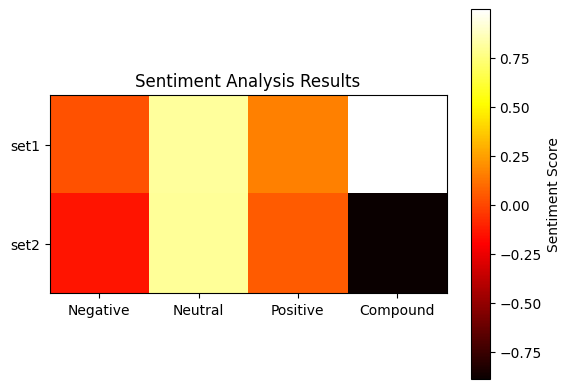

In [ ]:
#Create Heatmap for the results
sentiment_heatmap = np.array([[0.026, 0.814 , 0.16 , 0.9997 ],[-0.141 , 0.804, 0.055 , -0.89]])
texts = ['set1', 'set2']
sentiments = ['Negative', 'Neutral', 'Positive', 'Compound']

plt.imshow(sentiment_heatmap, cmap='hot', interpolation='nearest')
plt.colorbar(label='Sentiment Score')
plt.xticks(np.arange(len(sentiments)), sentiments)
plt.yticks(np.arange(len(texts)), texts)
plt.title('Sentiment Analysis Results')
plt.show()